# 3D plots from records (IAT fixed, ST changing)

In [6]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [7]:
#IAT fixed, ST changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVa.csv')
df = df.sort_values(by='mu_kurt')


filtered_df_121 = df[(df["coeffST_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

filtered_df_4 = df[(df["coeffST_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

filtered_df_25 = df[(df["coeffST_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

filtered_df_64 = df[(df["coeffST_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq    lam_kurt   mu_kurt  Response time
928            16        1.21   70.814884  9.352423      18.800938
178            16        1.21   84.323127  9.353178      17.511326
2114           16        1.21  508.179877  9.356143       5.489992
786            16        1.21   70.577477  9.358690      18.825061
79             16        1.21   48.398292  9.358707      21.369152
      coeffIAT_sq  coeffST_sq    lam_kurt    mu_kurt  Response time
5262           16         4.0   50.467774  12.755218      23.237908
3318           16         4.0   48.706443  12.776119      23.428760
3951           16         4.0   52.183494  12.784146      23.053995
4918           16         4.0  358.309857  12.791387      11.217254
3613           16         4.0   64.961707  12.803343      21.810462
      coeffIAT_sq  coeffST_sq    lam_kurt    mu_kurt  Response time
6142           16        25.0   64.775826  75.144947      38.419518
6723           16        25.0   61.559872  75.170266  

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


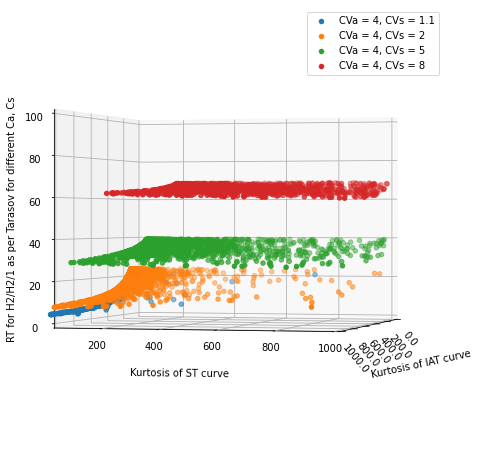

In [8]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = 'CVa = 4, CVs = 1.1')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = 'CVa = 4, CVs = 2')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = 'CVa = 4, CVs = 5')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = 'CVa = 4, CVs = 8')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,100)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel('Kurtosis of IAT curve', labelpad = 20)
ax1.set_ylabel('Kurtosis of ST curve', labelpad = 20)
ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca, Cs')
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')

'''
plt.legend()
plt.savefig("DetailsH2_H2_1_fixedmean_CVa(constantIATparams)3D.pdf", dpi = 100)
plt.show()

# 3D plots from records (ST fixed, IAT changing)


In [3]:
#ST fixed, IAT changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVs.csv')
df = df.sort_values(by='lam_kurt')


filtered_df_121 = df[(df["coeffIAT_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

filtered_df_4 = df[(df["coeffIAT_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

filtered_df_25 = df[(df["coeffIAT_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

filtered_df_64 = df[(df["coeffIAT_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq  lam_kurt     mu_kurt  Response time
2614         1.21          16  6.114112  445.690130      49.971444
1251         1.21          16  6.116270  208.496492      49.971330
141          1.21          16  6.124142  197.706997      49.971134
1685         1.21          16  6.134320  433.758904      49.970005
1380         1.21          16  6.135325  414.093027      49.969940
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
3136          4.0          16  12.759618  299.034264      53.455497
5815          4.0          16  12.764205  414.027312      53.454991
4027          4.0          16  12.801314  439.226461      53.450914
5905          4.0          16  12.804985  307.532051      53.450530
4484          4.0          16  12.805920  584.973929      53.450404
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
6065         25.0          16  75.138369  242.837757      79.691495
8266         25.0          16  75.140385  607.442654  

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


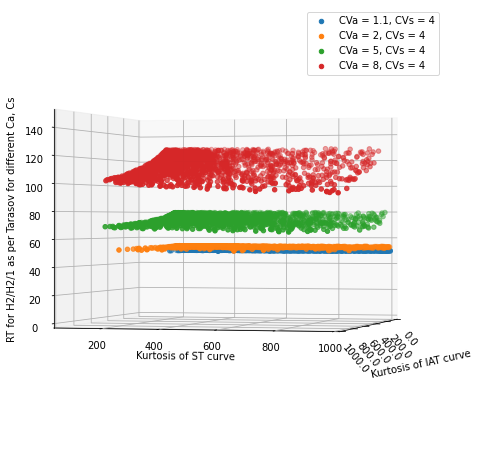

In [4]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = 'CVa = 1.1, CVs = 4')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = 'CVa = 2, CVs = 4')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = 'CVa = 5, CVs = 4')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = 'CVa = 8, CVs = 4')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,150)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel('Kurtosis of IAT curve', labelpad = 20)
ax1.set_ylabel('Kurtosis of ST curve')
ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca, Cs')
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')
'''
plt.tight_layout()
plt.legend()
plt.savefig("DetailsH2_H2_1_fixedmean_CVs(constantSTparams)3D.pdf", dpi = 100)
plt.show()